# Rescaling a Feature

In [78]:
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import make_regression

In [79]:
X,y = make_regression(n_samples=100, n_features=3, 
                      n_informative=3, n_targets=1, 
                      noise=0, random_state=0)

In [80]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0,1))

In [81]:
new_features = minmax_scale.fit_transform(X)

In [82]:
X[:4]

array([[-0.63432209,  0.3024719 , -0.36274117],
       [ 1.78587049,  0.01050002,  0.12691209],
       [ 1.71334272, -0.06824161, -0.74475482],
       [-0.31932842,  0.14195316,  0.69153875]])

In [83]:
new_features[:4]

array([[0.42120884, 0.54832275, 0.45513563],
       [0.89795228, 0.48494083, 0.55688602],
       [0.88366534, 0.46784742, 0.37575285],
       [0.48325811, 0.51347698, 0.67421595]])

# Standardizing a Feature

In [84]:
from sklearn.datasets import make_classification

In [85]:
X,y = make_classification(n_samples=100, n_features=3, n_informative=3, 
                         n_redundant=0, n_classes=3, weights=[0.5,0.3,0.2])

In [86]:
from matplotlib import pyplot as plt

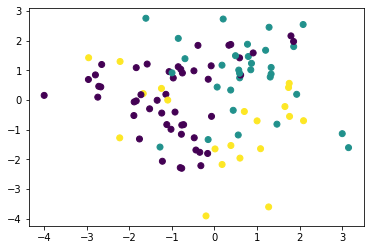

In [87]:
plt.scatter(X[:,0], X[:,1], c=y)

In [88]:
model = preprocessing.StandardScaler()

In [89]:
new_x = model.fit_transform(X)

In [90]:
new_x

array([[ 1.07603527,  0.46258386,  0.278424  ],
       [-0.34647313, -0.6907003 , -0.38226316],
       [ 1.09063983,  0.53691635, -0.58888071],
       [ 1.3771776 ,  0.20932328,  0.73349062],
       [ 0.05774003,  0.40954557, -1.3646037 ],
       [ 0.42828181,  1.25179202,  1.17290046],
       [-0.69530792, -1.57766141, -0.75232537],
       [ 0.43019586, -1.19629108,  0.53178361],
       [ 0.57276534,  0.92726528, -0.54113103],
       [-0.43434317,  1.39963023, -0.87725682],
       [ 0.57446377,  0.442879  ,  1.30200243],
       [-1.12469699, -0.11526473,  0.14434476],
       [ 0.1695695 , -1.27887848,  1.99128875],
       [-0.55391166, -0.80262328,  0.11776509],
       [ 1.46175843,  1.20008003,  0.59001332],
       [ 0.86032244, -0.59919216,  0.76049864],
       [-1.79522693,  0.51448387, -1.02158072],
       [ 0.11190086, -0.49015738, -0.50332275],
       [ 1.51078488,  0.04447251, -0.45823611],
       [-0.17197186, -1.00925616, -0.85439243],
       [ 0.10619389,  0.73463623,  0.069

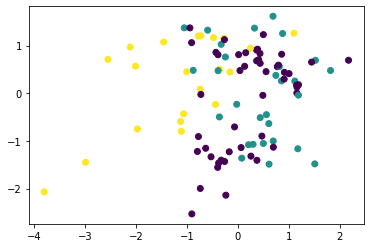

In [43]:
plt.scatter(new_x[:,0], new_x[:,1], c=y)

In [50]:
new_x.mean()

-8.289665250534503e-17

In [46]:
new_x.std()

1.0

In [54]:
model1 = preprocessing.RobustScaler() # it is often helpful to instead rescale the feature using the median and quartile range if there's outliers

In [53]:
model1.fit_transform(X).mean()

-0.14961923927578036

# Normalizing Observations

In [55]:
from sklearn.preprocessing import Normalizer

In [56]:
features = np.array([[0.5, 0.5],[1.1, 3.4], [1.5, 20.2], [1.63, 34.4], [10.9, 3.3]])

In [58]:
model = Normalizer(norm='l2')

In [61]:
new_features = model.fit_transform(features)

In [62]:
new_features[0,0] + new_features[0,1]

1.414213562373095

In [63]:
new_features2 = Normalizer(norm='l1').fit_transform(features)

In [64]:
new_features2[0,0] + new_features2[0,1]

1.0

# Generating Polynomial and Interaction Features

In [394]:
features = np.array([[2, 3],
                     [2, 3],
                     [2, 3]])

In [395]:
polynomial_interaction = PolynomialFeatures(degree=3, include_bias=False)

In [399]:
polynomial_interaction.fit_transform(features)

array([[ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.],
       [ 2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [400]:
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [402]:
interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

# Transforming Features

In [1]:
from sklearn.preprocessing import FunctionTransformer

In [11]:
import pandas as pd

In [4]:
features = np.array([[2, 3],[2, 3], [2, 3]])

In [29]:
def add_ten(x):
    return x+10

In [30]:
ten_trans = FunctionTransformer(add_ten)

In [31]:
ten_trans.fit_transform(features)

array([[12, 13],
       [12, 13],
       [12, 13]])

In [54]:
df['feature1']

0    2
1    2
2    2
Name: feature1, dtype: int64

In [58]:
def mins_ten(x):
    return x-10

In [70]:
df = pd.DataFrame(features)
df.columns = ['feature1', 'feature2']
df.apply(mins_ten)

,feature1,feature2
0,-8,-7
1,-8,-7
2,-8,-7


In [72]:
df

,feature1,feature2
0,2,3
1,2,3
2,2,3


In [75]:
df['feature1'].apply(lambda x: x-np.mean(x))

0    0.0
1    0.0
2    0.0
Name: feature1, dtype: float64

# Detecting Outliers

In [93]:
from sklearn.covariance import EllipticEnvelope

In [94]:
from sklearn.datasets import make_blobs

In [97]:
data, _ = make_blobs(n_samples=20, n_features=2, centers=1)

In [98]:
data[0,1] = 10000
data[1,1] = 10000

In [99]:
outlierdetect = EllipticEnvelope(contamination=0.1)

In [100]:
outlierdetect.fit_predict(data)

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1])

In [112]:
feature = data[:,0]

In [113]:
def detect(x):
    q1, q3 = np.percentile(x, [25,75])
    iqr = q3-q1
    lower_bound = q1 - (iqr*1.5)
    upper_bound = q3 + (iqr*1.5)
    return np.where((x<lower_bound) | (x>upper_bound))

In [114]:
detect(feature)

(array([4]),)

# Handling Outliers

In [115]:
df = pd.DataFrame({'price':[534433, 392333, 293222, 4322032], 'bathrooms':[2, 3.5, 2, 116], 'sqft':[1500, 2500, 1500, 48000]})

In [116]:
df

,price,bathrooms,sqft
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


In [117]:
df['outlier'] = np.where(df['bathrooms']<20, 0,1)

In [118]:
df

,price,bathrooms,sqft,outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [119]:
df['log_sqft'] = [np.log(i) for i in df['sqft']]

In [120]:
df

,price,bathrooms,sqft,outlier,log_sqft
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


In [125]:
df['bathrooms'].value_counts()

2.0      2
3.5      1
116.0    1
Name: bathrooms, dtype: int64

In [128]:
df['outlier'].unique()

array([0, 1])

In [132]:
df['bathrooms'].count()

4

# Discretizating Features

In [134]:
from sklearn.preprocessing import  Binarizer

In [135]:
age = np.array([[6],[12],[20],[36],[65]])

In [140]:
bin = Binarizer(60)
bin.fit_transform(age)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass threshold=60 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


array([[0],
       [0],
       [0],
       [0],
       [1]])

In [143]:
np.digitize(age, bins=[20,40,60], right=True)

array([[0],
       [0],
       [0],
       [1],
       [3]])

In [144]:
np.digitize(age, bins=[20,40,60])

array([[0],
       [0],
       [1],
       [1],
       [3]])

# Grouping Observations Using Clustering

In [145]:
from sklearn.cluster import KMeans

In [155]:
dat,y = make_blobs(n_samples=50, n_features = 3, centers=3, random_state=2)

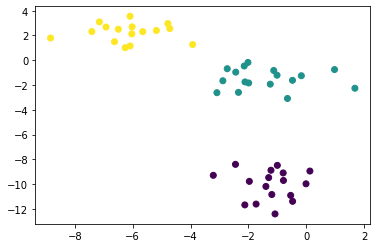

In [156]:
plt.scatter(dat[:,0], dat[:,1], c=y)

In [157]:
model = KMeans(n_clusters=3)

In [160]:
df = pd.DataFrame(dat)
df['type'] = model.fit(dat).predict(dat)
df.head()

,0,1,2,type
0,-6.257266,1.010652,-3.603902,0
1,-2.732997,-0.683557,-4.315020,2
2,-2.448002,-8.401412,-2.498565,1
3,-5.651726,2.305496,-4.269510,0
4,-1.245658,-1.930295,-4.093451,2


In [165]:
y_ = model.fit(dat).predict(dat)
centers = model.cluster_centers_

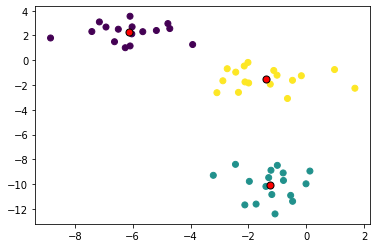

In [170]:
plt.scatter(dat[:,0], dat[:,1], c=y_)
plt.scatter(centers[:,0], centers[:,1], facecolor='red', edgecolor='black', s=50)

# Deleting Observations with Missing Values

In [ ]:
features = np.array([[1.1, 11.1],[2.2, 22.2], [3.3, 33.3], [4.4, 44.4], [np.nan, 55]])

In [178]:
np.isnan(feature).any()

False

In [181]:
df = pd.DataFrame(features)
df.isnull().any()

0     True
1    False
dtype: bool

In [182]:
df.dropna()

,0,1
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


In [184]:
df.fillna(method='ffill')

,0,1
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4
4,4.4,55.0


# Imputing Missing Values

In [187]:
pip install fancyimpute

     |████████████████████████████████| 880 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 3.4 MB/s eta 0:00:01
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=49a5f53f73290838cff12e32161f312a93a1bb995b645eb22d864cbcf62d5d7b
  Stored in directory: /Users/david/Library/Caches/pip/wheels/f9/fc/6a/b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=b0e90cae1c4f5ef6e0476c36a597154d1ff8e25882263eb38f7b6fd500494537
  Stored in directory: /Users/david/Library/Caches/pip/wheels/88/c4/be/e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute kn

In [207]:
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler

In [203]:
X,y = make_blobs(n_samples=1000, n_features=3, centers=3,random_state=1)

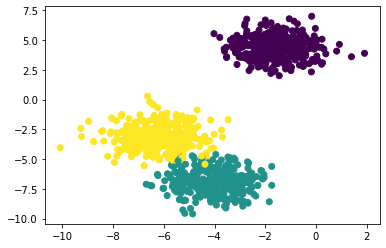

In [204]:
plt.scatter(X[:,0], X[:,1],c=y)

In [208]:
scaler = StandardScaler()

In [210]:
scalered_X = scaler.fit_transform(X)

In [211]:
true_value = scalered_X[0,0]

In [212]:
scalered_X[0,0]=np.nan

In [215]:
imputed = KNN(k=5, verbose=True).fit_transform(scalered_X)

Imputing row 1/1000 with 1 missing, elapsed time: 0.122
Imputing row 101/1000 with 0 missing, elapsed time: 0.131
Imputing row 201/1000 with 0 missing, elapsed time: 0.131
Imputing row 301/1000 with 0 missing, elapsed time: 0.131
Imputing row 401/1000 with 0 missing, elapsed time: 0.131
Imputing row 501/1000 with 0 missing, elapsed time: 0.132
Imputing row 601/1000 with 0 missing, elapsed time: 0.132
Imputing row 701/1000 with 0 missing, elapsed time: 0.132
Imputing row 801/1000 with 0 missing, elapsed time: 0.132
Imputing row 901/1000 with 0 missing, elapsed time: 0.133


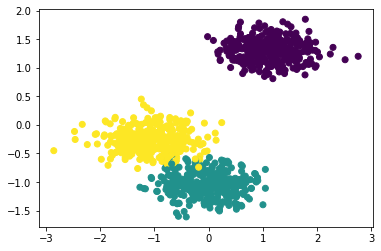

In [218]:
plt.scatter(scalered_X[:,0], scalered_X[:,1],c=y)

In [216]:
print(imputed[0,0])

1.1307396879340232


In [217]:
print(true_value)

1.0268022656121025


In [224]:
from sklearn.impute import SimpleImputer

In [225]:
model = SimpleImputer(strategy = 'mean')

In [226]:
new_X = model.fit_transform(X)

In [228]:
true_value

1.0268022656121025

In [229]:
new_X[0,0]

-1.7853194026358656